In [2]:
# load packages 
library(reshape2)
library(ggplot2)
library(Rmisc)
library(lme4)
library(lmerTest)
library(brms)
library(gridExtra)
library(ggbeeswarm)

In [3]:
# set working directory to dataFiles and read in files
setwd('../dataFiles')
item<-read.csv('collectMem_item.csv')
acc<-read.csv('collectMem_accuracy.csv')
dist<-read.csv('collectMem_distance.csv')

## collective memory for pandemic news was stronger, more surprising and negative

In [4]:
# set factor order
item$datePlot <- factor(item$datePlot, c("JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"))

# dataframe for retrieved events
itemRem<-subset(item, memory!=0)

In [5]:
# testing how covid was remembered only on retrieved items
summary(mod<-lmer(scale(memory)~covid+(1|subject),data=itemRem,control=lmerControl("bobyqa")))
summary(mod<-lmer(scale(surprise)~covid+(1|subject),data=itemRem,control=lmerControl("bobyqa")))
summary(mod<-lmer(scale(positive)~covid+(1|subject),data=itemRem,control=lmerControl("bobyqa")))
summary(mod<-lmer(scale(negative)~covid+(1|subject),data=itemRem,control=lmerControl("bobyqa")))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: scale(memory) ~ covid + (1 | subject)
   Data: itemRem
Control: lmerControl("bobyqa")

REML criterion at convergence: 8302.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7799 -0.6448  0.2473  0.7316  2.1674 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.1973   0.4442  
 Residual             0.7648   0.8745  
Number of obs: 3104, groups:  subject, 200

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)   -0.04968    0.03549  203.93482   -1.40    0.163    
covid          0.80896    0.06401 2906.62431   12.64   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
      (Intr)
covid -0.120

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: scale(surprise) ~ covid + (1 | subject)
   Data: itemRem
Control: lmerControl("bobyqa")

REML criterion at convergence: 8437.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.1987 -0.8441 -0.1462  0.8100  2.2696 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.1075   0.3278  
 Residual             0.8249   0.9082  
Number of obs: 3104, groups:  subject, 200

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)   -0.06460    0.02881  208.51371  -2.243    0.026 *  
covid          1.05920    0.06646 2910.86557  15.938   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
      (Intr)
covid -0.153

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: scale(positive) ~ covid + (1 | subject)
   Data: itemRem
Control: lmerControl("bobyqa")

REML criterion at convergence: 8761.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.9774 -0.7693 -0.5904  0.6666  2.5188 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.01901  0.1379  
 Residual             0.96586  0.9828  
Number of obs: 3104, groups:  subject, 200

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)    0.03340    0.02076  221.05805   1.609    0.109    
covid         -0.50683    0.07187 2925.30117  -7.052 2.19e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
      (Intr)
covid -0.225

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: scale(negative) ~ covid + (1 | subject)
   Data: itemRem
Control: lmerControl("bobyqa")

REML criterion at convergence: 8604.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.1109 -0.9094 -0.2884  0.8491  1.8949 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.02771  0.1665  
 Residual             0.91132  0.9546  
Number of obs: 3104, groups:  subject, 200

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)   -0.06557    0.02137  211.44553  -3.069  0.00243 ** 
covid          1.01014    0.06982 2915.95588  14.468  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
      (Intr)
covid -0.213

In [14]:
# bayesian regression models (for confidence intervals)
brm(scale(memory)~1+covid+(1|subject),data = itemRem, init = "random", cores=10)
brm(scale(surprise)~1+covid+(1|subject),data = itemRem, init = "random", cores=10)
brm(scale(positive)~1+covid+(1|subject),data = itemRem, init = "random", cores=10)
brm(scale(negative)~1+covid+(1|subject),data = itemRem, init = "random", cores=10)

Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: scale(memory) ~ 1 + covid + (1 | subject) 
   Data: itemRem (Number of observations: 3104) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~subject (Number of levels: 200) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.45      0.03     0.39     0.51 1.00     1490     2173

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept    -0.05      0.04    -0.12     0.02 1.00     1759     2764
covid         0.81      0.06     0.68     0.93 1.00     8804     3021

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.87      0.01     0.85     0.90 1.00     8320     3198

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rh

Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: scale(surprise) ~ 1 + covid + (1 | subject) 
   Data: itemRem (Number of observations: 3104) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~subject (Number of levels: 200) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.33      0.02     0.28     0.38 1.00     1964     3167

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept    -0.06      0.03    -0.12    -0.01 1.00     2802     3155
covid         1.06      0.07     0.93     1.20 1.00    10720     2524

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.91      0.01     0.89     0.93 1.00     7125     3161

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and 

Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: scale(positive) ~ 1 + covid + (1 | subject) 
   Data: itemRem (Number of observations: 3104) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~subject (Number of levels: 200) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.13      0.03     0.05     0.19 1.01      853      938

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     0.03      0.02    -0.01     0.07 1.00     6406     3458
covid        -0.51      0.07    -0.65    -0.36 1.00     8180     2836

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.98      0.01     0.96     1.01 1.00     5371     2483

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and 

Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: scale(negative) ~ 1 + covid + (1 | subject) 
   Data: itemRem (Number of observations: 3104) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~subject (Number of levels: 200) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.16      0.03     0.11     0.22 1.00     1638     2429

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept    -0.07      0.02    -0.11    -0.02 1.00     5399     3674
covid         1.01      0.07     0.87     1.14 1.00     8265     2359

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.96      0.01     0.93     0.98 1.00     6522     3173

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and 

### testing covid memory accuracy

In [6]:
summary(mod<-lmer(scale(absError)~covid+(1|subject),data=acc,control=lmerControl("bobyqa")))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: scale(absError) ~ covid + (1 | subject)
   Data: acc
Control: lmerControl("bobyqa")

REML criterion at convergence: 8728.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.2203 -0.8032 -0.3304  0.5338  3.5947 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.03193  0.1787  
 Residual             0.94620  0.9727  
Number of obs: 3104, groups:  subject, 200

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)    0.03665    0.02214  212.14783   1.655   0.0994 .  
covid         -0.60557    0.07115 2916.29735  -8.512   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
      (Intr)
covid -0.210

In [17]:
summary(brm(scale(absError)~1+covid+(1|subject),data = acc, init = "random", cores=10))

Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: scale(absError) ~ 1 + covid + (1 | subject) 
   Data: acc (Number of observations: 3104) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~subject (Number of levels: 200) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.18      0.03     0.12     0.23 1.00     1496     2653

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     0.04      0.02    -0.01     0.08 1.00     5516     3108
covid        -0.61      0.07    -0.74    -0.47 1.00     8943     2832

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.97      0.01     0.95     1.00 1.00     7491     3142

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat

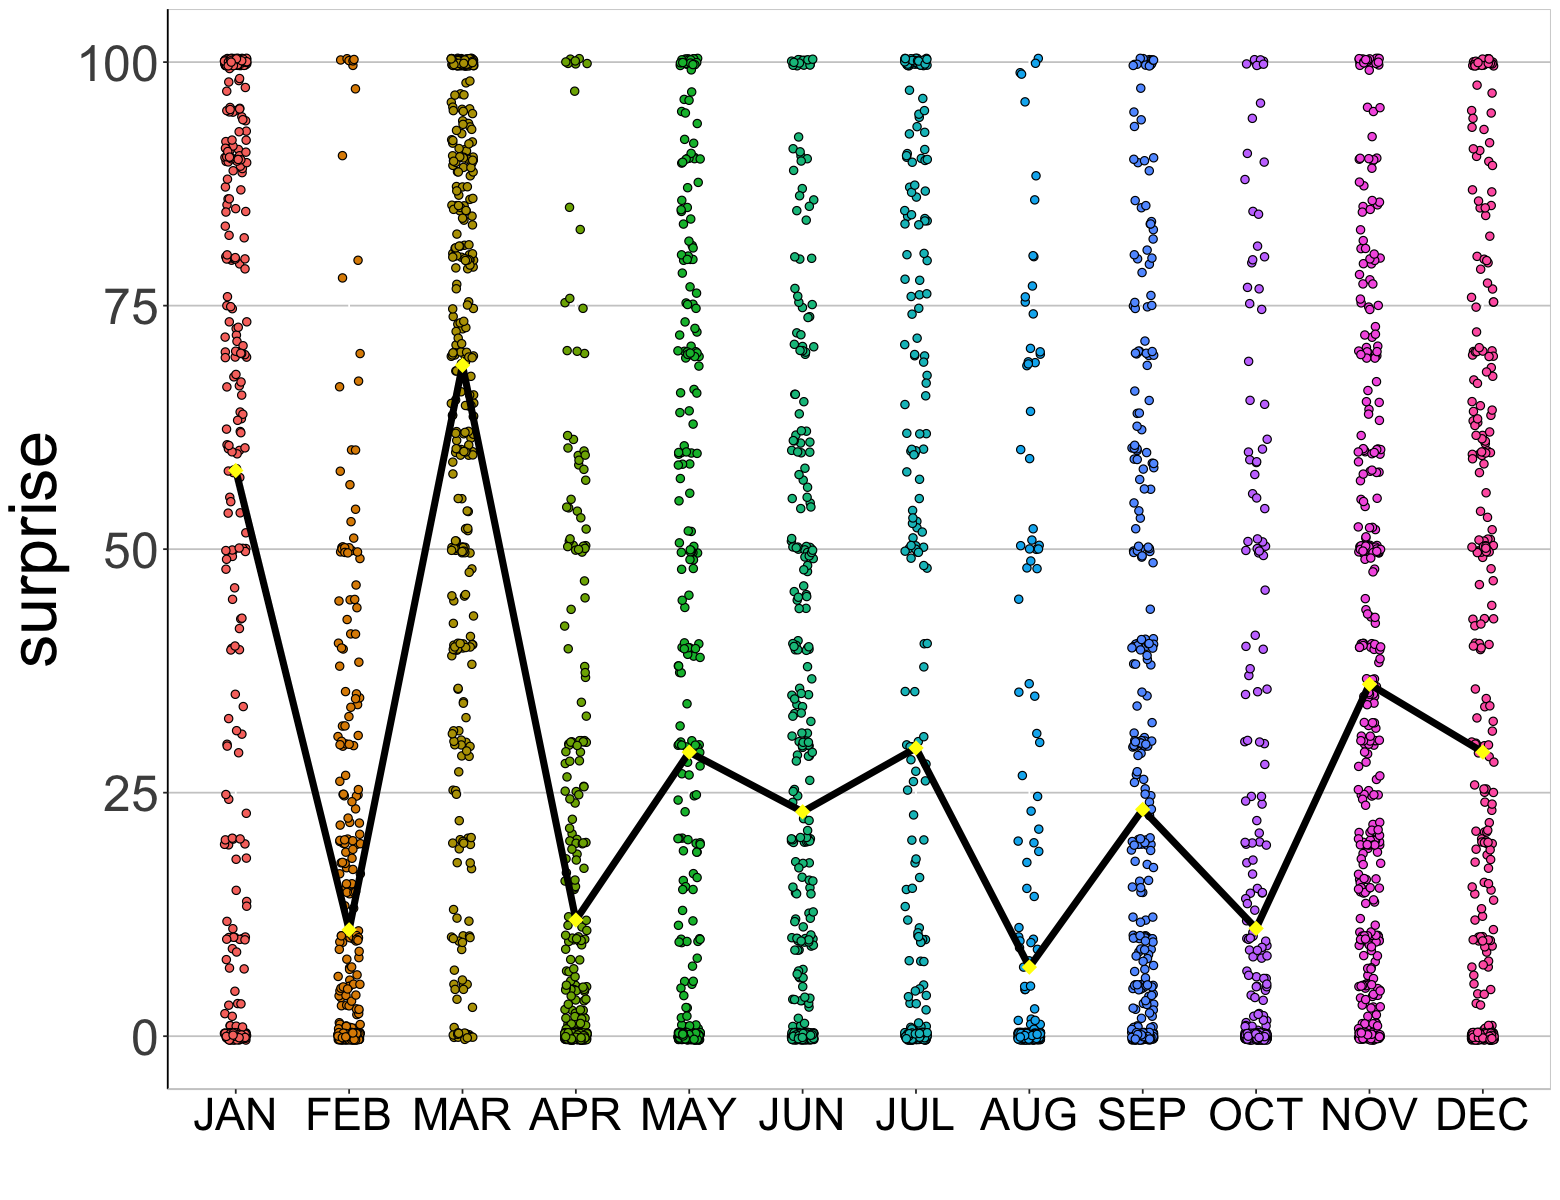

In [29]:
# memorability across months
options(repr.plot.width=13,repr.plot.height=10)

# summary dataframe
itemDF<-summarySE(item,measurevar="surprise",groupvars=c("datePlot"),na.rm=TRUE)

ggplot(data = item,aes(x = datePlot, y = surprise, fill=datePlot))+ylab('surprise')+xlab('')+
  geom_jitter(shape = 21,size=2,alpha=1,width=0.1)+
  geom_line(data=itemDF, aes(group=1),color="black",size=2)+
  geom_point(data=itemDF, size=4,color="yellow",shape=18)+
  theme(panel.background = element_rect(fill = "white"), panel.border = element_rect(color = "grey80",fill=NA),panel.grid.major.y = element_line(color = "grey80"),axis.line.x = element_line(colour = "grey80"),axis.text.x = element_text(color='black',size=27), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=30),axis.text = element_text(size=30),axis.title.y = element_text(size=40),legend.position='none')


## remembered surprise, positive affect, and negative affect were separately associated with greater event memorability

In [31]:
summary(mod<-lmer(scale(memory)~scale(surprise)+scale(negative)+scale(positive)+(1|subject),data=itemRem,control=lmerControl("bobyqa")))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: scale(memory) ~ scale(surprise) + scale(negative) + scale(positive) +  
    (1 | subject)
   Data: itemRem
Control: lmerControl("bobyqa")

REML criterion at convergence: 6928.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.4852 -0.5923  0.1112  0.6593  3.5266 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.1464   0.3827  
 Residual             0.4850   0.6964  
Number of obs: 3104, groups:  subject, 200

Fixed effects:
                 Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)     1.697e-03  2.990e-02 1.984e+02   0.057    0.955    
scale(surprise) 2.294e-01  1.461e-02 3.041e+03  15.700   <2e-16 ***
scale(negative) 5.192e-01  1.695e-02 3.058e+03  30.630   <2e-16 ***
scale(positive) 4.505e-01  1.592e-02 3.055e+03  28.298   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed E

In [131]:
summary(brm(scale(memory)~1+scale(surprise)+scale(negative)+scale(positive)+(1|subject),data = itemRem, init = "random", cores=10))

Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: scale(memory) ~ 1 + scale(surprise) + scale(negative) + scale(positive) + (1 | PROLIFIC_PID) 
   Data: itemRem (Number of observations: 3104) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~PROLIFIC_PID (Number of levels: 200) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.38      0.02     0.34     0.43 1.00     1528     2334

Population-Level Effects: 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept         0.00      0.03    -0.06     0.06 1.00     1307     2159
scalesurprise     0.23      0.01     0.20     0.26 1.00     5754     3243
scalenegative     0.52      0.02     0.48     0.55 1.00     4588     3448
scalepositive     0.45      0.02     0.42     0.48 1.00     4571     2948

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI

`geom_smooth()` using formula = 'y ~ x'


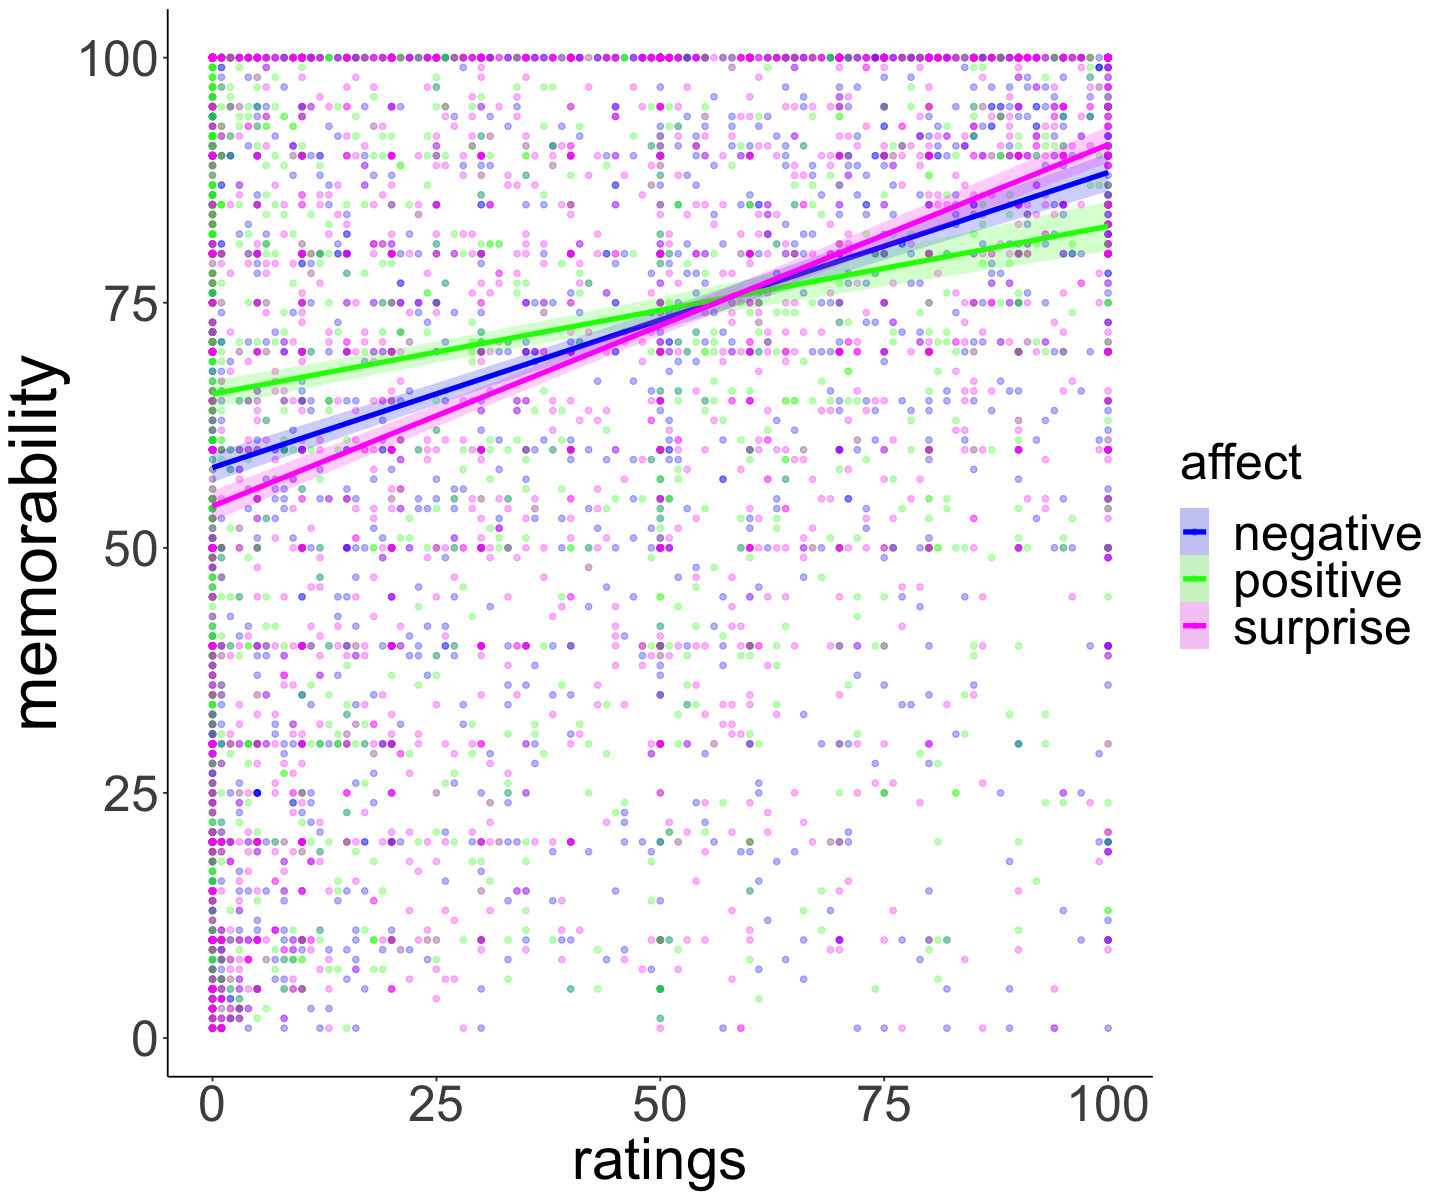

In [32]:
options(repr.plot.width=12,repr.plot.height=10)

itemRem2<-itemRem[,c(4:7)]
item_melt<-melt(itemRem2,id.vars=c("memory"))
colnames(item_melt)<-c('memorability','affect','value')

ggplot(item_melt,aes(x=value,y=memorability,color=affect,fill=affect))+
  geom_point(alpha=0.3,size=1.5)+stat_smooth(method = "lm",alpha=0.2,size=1.5)+
  scale_fill_manual(values=c("blue","green","magenta"))+scale_colour_manual(values=c("blue","green","magenta"))+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title.x = element_text(size=35),axis.text = element_text(size=30),legend.text=element_text(size=30),axis.title.y=element_text(size=40),legend.title=element_text(size=30))+
  xlab("ratings")


## lockdown compressed perceived time between events

In [5]:
# subset for only remembered items (and short distance analysis)
distMem<-subset(dist,bothMem==1) # subset for reported retrieved
distMem_correctOrder<-subset(distMem,pairOrder==1) # subset for correctly ordered
short<-subset(distMem,distFactor==0) # matched shorter distances
short_correctOrder<-subset(distMem_correctOrder,distFactor==0) # subset for correctly ordered

In [10]:
# actual distance does predict people's estimated subjective distance
summary(mod<-lmer(value~actualDist+(1|subject),data=distMem_correctOrder,control=lmerControl("bobyqa")))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: value ~ actualDist + (1 | subject)
   Data: distMem_correctOrder
Control: lmerControl("bobyqa")

REML criterion at convergence: 12549.3

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.76201 -0.72823 -0.02382  0.75845  2.69887 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept)  21.41    4.627  
 Residual             566.41   23.799  
Number of obs: 1362, groups:  subject, 200

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 3.221e+01  1.333e+00 1.072e+03   24.17   <2e-16 ***
actualDist  1.577e-01  8.851e-03 1.218e+03   17.82   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
           (Intr)
actualDist -0.838

In [27]:
# memorability for retrieved items does not modulate distance
summary(mod<-lmer(value~avgMem+(1|subject),data=distMem_correctOrder,control=lmerControl("bobyqa")))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: value ~ avgMem + (1 | subject)
   Data: distMem_correctOrder
Control: lmerControl("bobyqa")

REML criterion at convergence: 12828.7

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.96623 -0.81931 -0.06307  0.84918  1.83755 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept)   5.06    2.249  
 Residual             715.78   26.754  
Number of obs: 1362, groups:  subject, 200

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)  52.305861   3.692698 475.561800  14.165   <2e-16 ***
avgMem       -0.003479   0.042505 499.315480  -0.082    0.935    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
       (Intr)
avgMem -0.980

In [13]:
summary(brm(value~1+actualDist+(1|subject),data = distMem_correctOrder, init = "random", control=list(adapt_delta=0.9), iter=3000,cores=10))

Compiling Stan program...

recompiling to avoid crashing R session

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: value ~ 1 + actualDist + (1 | subject) 
   Data: distMem_correctOrder (Number of observations: 1362) 
  Draws: 4 chains, each with iter = 3000; warmup = 1500; thin = 1;
         total post-warmup draws = 6000

Group-Level Effects: 
~subject (Number of levels: 200) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     4.28      1.42     0.87     6.70 1.00     1360     1566

Population-Level Effects: 
           Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     32.19      1.30    29.62    34.72 1.00    10429     4877
actualDist     0.16      0.01     0.14     0.17 1.00    11003     4274

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma    23.86      0.49    22.91    24.84 1.00     5023     4324

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size mea

In [25]:
summary(brm(value~1+avgMem+(1|subject),data = distMem_correctOrder, init = "random", control=list(adapt_delta=0.9), iter=3000,cores=10))

Compiling Stan program...

recompiling to avoid crashing R session

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: value ~ 1 + avgMem + (1 | subject) 
   Data: distMem_correctOrder (Number of observations: 1362) 
  Draws: 4 chains, each with iter = 3000; warmup = 1500; thin = 1;
         total post-warmup draws = 6000

Group-Level Effects: 
~subject (Number of levels: 200) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     2.42      1.45     0.15     5.28 1.00     1364     2705

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept    52.22      3.68    45.05    59.57 1.00     8314     4158
avgMem       -0.00      0.04    -0.09     0.08 1.00     8193     4186

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma    26.74      0.53    25.72    27.78 1.00     7317     4064

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, 

In [31]:
# before-lockdown as baseline
distMem_correctOrder$lockdownFactor<- factor(distMem_correctOrder$lockdownFactor, c("bl", "l", "al"))
summary(mod<-lmer(propDiff~lockdownFactor+(1|subject),data=distMem_correctOrder,control=lmerControl("bobyqa")))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: propDiff ~ lockdownFactor + (1 | subject)
   Data: distMem_correctOrder
Control: lmerControl("bobyqa")

REML criterion at convergence: 18.3

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-3.02030 -0.66291  0.01977  0.65034  2.88543 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.002377 0.04876 
 Residual             0.056450 0.23759 
Number of obs: 1362, groups:  subject, 200

Fixed effects:
                   Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)       2.554e-01  1.511e-02  1.100e+03  16.896   <2e-16 ***
lockdownFactorl  -1.721e-01  1.751e-02  1.289e+03  -9.825   <2e-16 ***
lockdownFactoral -1.534e-03  1.842e-02  1.309e+03  -0.083    0.934    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
                 (Intr) lockdownFactorl
lockdownFactorl  -0.817            

In [30]:
brm(propDiff~1+lockdownFactor+(1|subject),data = distMem_correctOrder, init = "random", cores=10)

Compiling Stan program...

recompiling to avoid crashing R session

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: propDiff ~ 1 + lockdownFactor + (1 | subject) 
   Data: distMem_correctOrder (Number of observations: 1362) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~subject (Number of levels: 200) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.05      0.01     0.01     0.07 1.01      755      601

Population-Level Effects: 
                 Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept            0.26      0.02     0.23     0.28 1.00     3805     2859
lockdownFactorl     -0.17      0.02    -0.21    -0.14 1.00     3692     2805
lockdownFactoral    -0.00      0.02    -0.04     0.03 1.00     3486     3317

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.24      0.00     0.23     0.25 1.00     2528     2519

Draws were

In [32]:
# after-lockdown as baseline
distMem_correctOrder$lockdownFactor<- factor(distMem_correctOrder$lockdownFactor, c("al", "l", "bl"))
summary(mod<-lmer(propDiff~lockdownFactor+(1|subject),data=distMem_correctOrder,control=lmerControl("bobyqa")))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: propDiff ~ lockdownFactor + (1 | subject)
   Data: distMem_correctOrder
Control: lmerControl("bobyqa")

REML criterion at convergence: 18.3

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-3.02030 -0.66291  0.01977  0.65034  2.88543 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.002377 0.04876 
 Residual             0.056450 0.23759 
Number of obs: 1362, groups:  subject, 200

Fixed effects:
                   Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)       2.538e-01  1.157e-02  8.036e+02  21.940   <2e-16 ***
lockdownFactorl  -1.705e-01  1.457e-02  1.223e+03 -11.706   <2e-16 ***
lockdownFactorbl  1.534e-03  1.842e-02  1.309e+03   0.083    0.934    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) lckdwnFctrl
lckdwnFctrl -0.721            
lckdwnFctrb -

In [33]:
brm(propDiff~1+lockdownFactor+(1|subject),data = distMem_correctOrder, init = "random", cores=10)

Compiling Stan program...

recompiling to avoid crashing R session

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: propDiff ~ 1 + lockdownFactor + (1 | subject) 
   Data: distMem_correctOrder (Number of observations: 1362) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~subject (Number of levels: 200) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.05      0.01     0.01     0.07 1.00      561      467

Population-Level Effects: 
                 Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept            0.25      0.01     0.23     0.28 1.00     4302     2991
lockdownFactorl     -0.17      0.01    -0.20    -0.14 1.00     4409     3008
lockdownFactorbl     0.00      0.02    -0.03     0.04 1.00     4666     3443

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.24      0.01     0.23     0.25 1.00     2343     2707

Draws were

In [40]:
# short distances contrast

# before-lockdown as baseline
short_correctOrder$lockdownFactor <- factor(short_correctOrder$lockdownFactor, c("bl", "l", "al"))
summary(mod<-lmer(value~lockdownFactor+actualDist+(1|subject),data=short_correctOrder,control=lmerControl("bobyqa")))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: value ~ lockdownFactor + actualDist + (1 | subject)
   Data: short_correctOrder
Control: lmerControl("bobyqa")

REML criterion at convergence: 6077.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.0750 -0.7015 -0.1450  0.6335  2.6560 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept)  94.36    9.714  
 Residual             469.58   21.670  
Number of obs: 666, groups:  subject, 200

Fixed effects:
                 Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)       20.8919     5.7629 598.3593   3.625 0.000313 ***
lockdownFactorl  -10.9299     2.8059 584.0237  -3.895 0.000109 ***
lockdownFactoral   4.1805     2.3133 574.2567   1.807 0.071266 .  
actualDist         0.3640     0.1003 562.4214   3.631 0.000309 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
                 (Intr) l

In [41]:
brm(value~1+lockdownFactor+actualDist+(1|subject),data = short_correctOrder, init = "random", cores=10)

Compiling Stan program...

recompiling to avoid crashing R session

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: value ~ 1 + lockdownFactor + actualDist + (1 | subject) 
   Data: short_correctOrder (Number of observations: 666) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~subject (Number of levels: 200) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     9.65      1.31     6.98    12.16 1.00     1568     2388

Population-Level Effects: 
                 Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept           20.97      5.85     9.37    32.67 1.00     6104     3045
lockdownFactorl    -10.85      2.91   -16.56    -4.97 1.00     5528     3129
lockdownFactoral     4.18      2.37    -0.43     8.79 1.00     9158     3010
actualDist           0.36      0.10     0.16     0.56 1.00     6326     2857

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Ta

In [42]:
# after lockdown as baseline
short_correctOrder$lockdownFactor <- factor(short_correctOrder$lockdownFactor, c("al", "l", "bl"))
summary(mod<-lmer(value~lockdownFactor+actualDist+(1|subject),data=short_correctOrder,control=lmerControl("bobyqa")))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: value ~ lockdownFactor + actualDist + (1 | subject)
   Data: short_correctOrder
Control: lmerControl("bobyqa")

REML criterion at convergence: 6077.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.0750 -0.7015 -0.1450  0.6335  2.6560 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept)  94.36    9.714  
 Residual             469.58   21.670  
Number of obs: 666, groups:  subject, 200

Fixed effects:
                 Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)       25.0724     5.4572 589.1590   4.594 5.31e-06 ***
lockdownFactorl  -15.1104     3.3227 566.8594  -4.548 6.64e-06 ***
lockdownFactorbl  -4.1805     2.3133 574.2567  -1.807 0.071266 .  
actualDist         0.3640     0.1003 562.4214   3.631 0.000309 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) lckdwn

In [43]:
brm(value~1+lockdownFactor+actualDist+(1|subject),data = short_correctOrder, init = "random", cores=10)

Compiling Stan program...

recompiling to avoid crashing R session

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: value ~ 1 + lockdownFactor + actualDist + (1 | subject) 
   Data: short_correctOrder (Number of observations: 666) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~subject (Number of levels: 200) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     9.63      1.32     7.02    12.19 1.00     1238     1747

Population-Level Effects: 
                 Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept           25.13      5.41    14.77    35.80 1.00     5325     3322
lockdownFactorl    -15.11      3.36   -21.75    -8.64 1.00     4166     3073
lockdownFactorbl    -4.17      2.32    -8.76     0.31 1.00     5998     3111
actualDist           0.36      0.10     0.17     0.56 1.00     4666     3477

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Ta

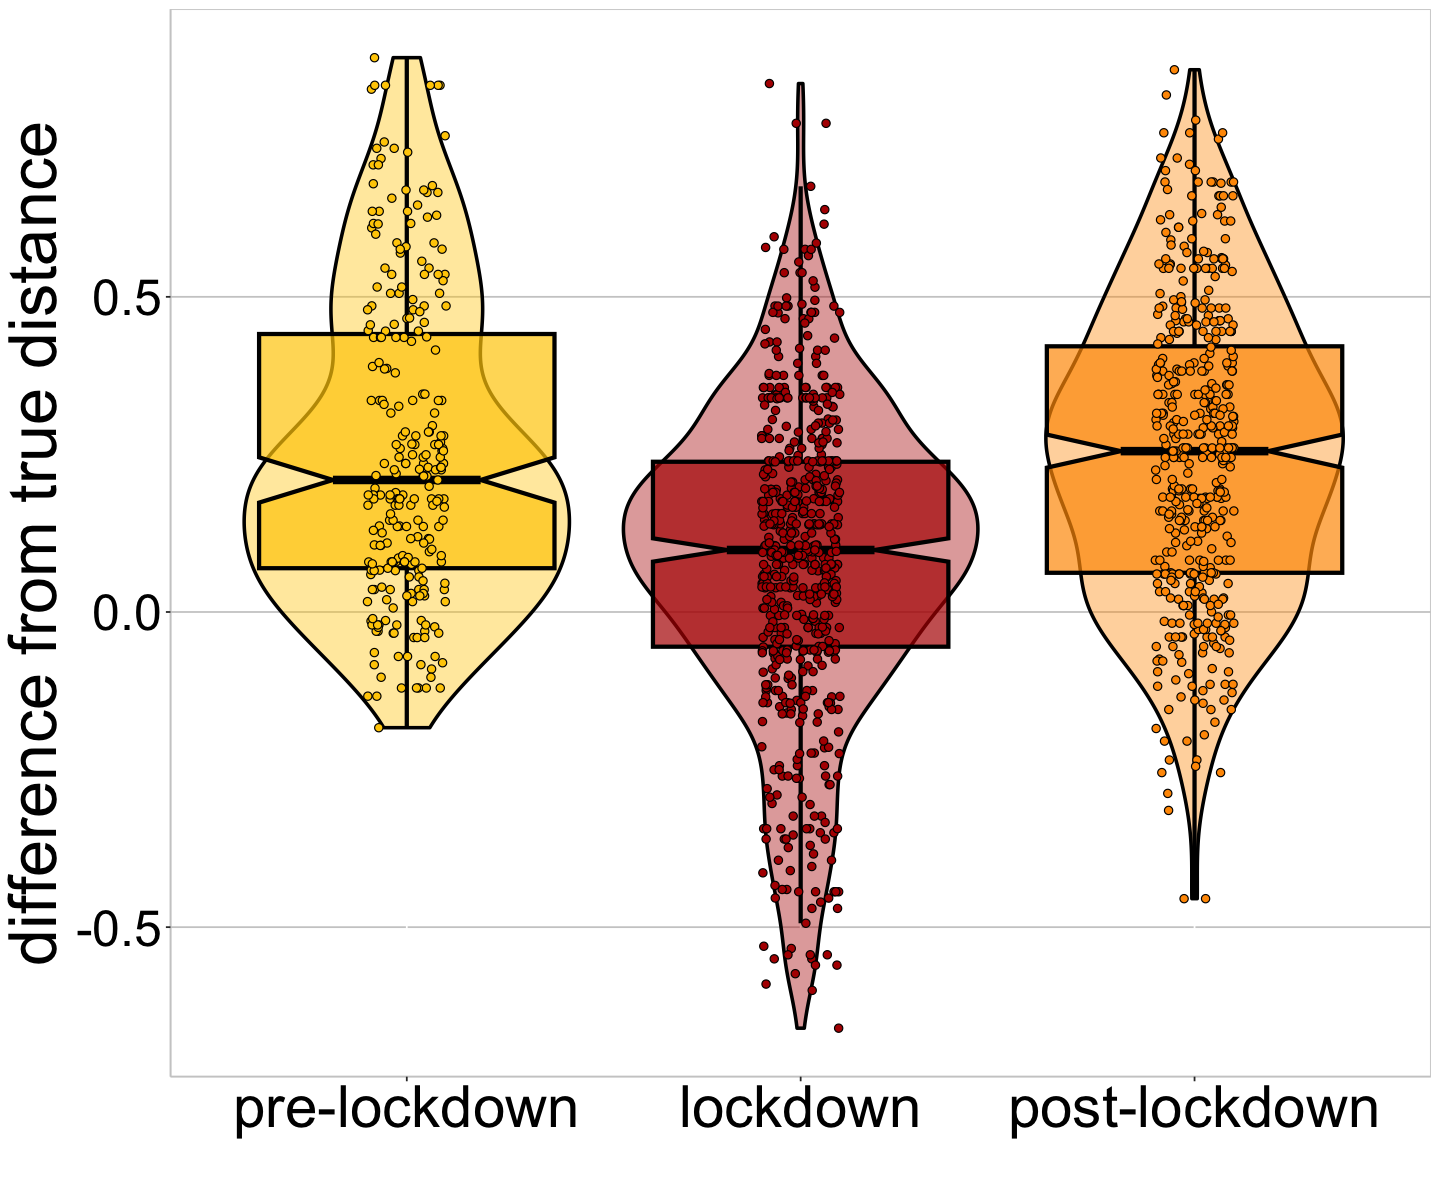

In [39]:
options(repr.plot.width=12,repr.plot.height=10)

# overall
distMem_correctOrder$ld<-ifelse(distMem_correctOrder$lockdownFactor=="bl","pre-lockdown",NA)
distMem_correctOrder$ld<-ifelse(distMem_correctOrder$lockdownFactor=="l","lockdown",distMem_correctOrder$ld)
distMem_correctOrder$ld<-ifelse(distMem_correctOrder$lockdownFactor=="al","post-lockdown",distMem_correctOrder$ld)
distMem_correctOrder$ld <- factor(distMem_correctOrder$ld , c("pre-lockdown", "lockdown", "post-lockdown"))

ggplot(data = distMem_correctOrder,aes(x = ld, y = propDiff, fill=ld))+ylab('difference from true distance')+xlab('')+
    geom_violin(alpha=0.4, position = position_dodge(width = .75),size=1,color="black") +
    geom_boxplot(notch = TRUE,  outlier.size = -1, color="black",lwd=1.2, alpha = 0.7)+
    geom_jitter(shape = 21,size=2,alpha=1,width=0.1)+scale_fill_manual(values=c("#ffcc00","#b30000","#ff9900"))+ 
    theme(panel.background = element_rect(fill = "white"), panel.border = element_rect(color = "grey80",fill=NA),panel.grid.major.y = element_line(color = "grey80"),axis.line.x = element_line(colour = "grey80"), axis.text.x = element_text(color="black",size=35), axis.text.y = element_text(color="black",size=30), axis.line.y = element_line(colour = "grey80"),axis.title = element_text(size=30),axis.text = element_text(size=30),axis.title.y=element_text(size=40),legend.title=element_text(size=30),legend.position="none")
